## Importing Google Drive Contents

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the CSV file from Google drive, making the labels for the messages for spam or ham, using one tab space as the delimeter

The first five rows of the DataFrame starting from 0, ending at 4:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


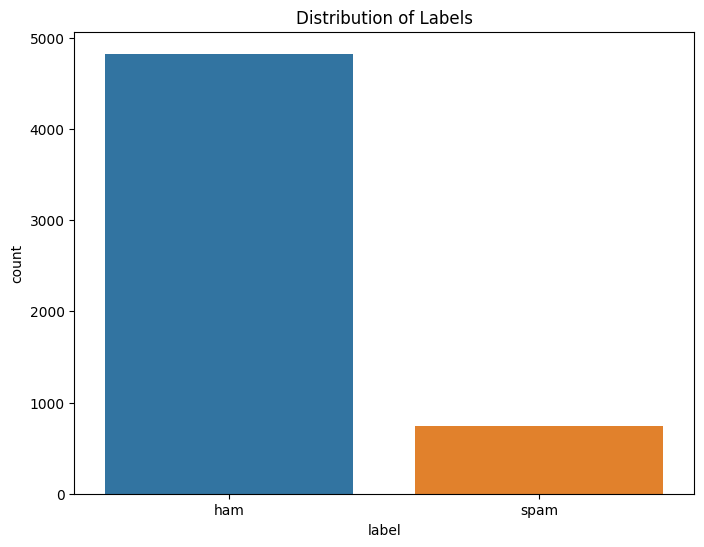

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_path = '/content/drive/MyDrive/CSV/SMSSpamCollection'
df = pd.read_csv(csv_path, on_bad_lines='skip', sep='\t', names=['label', 'message'])

df.head()

print("The first five rows of the DataFrame starting from 0, ending at 4:")
print(df.head())

# Plotting a countplot for visualizing the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()


## Using "Label Encoding" for turning the data into numeric values

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Splitting the data into features (X) and target variable (y)
X = df['message']
y = df['label']

## Splitting the data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Data after preprocessing or cleaning

In [32]:
print("DataFrame after cleaning:")
print(df)

DataFrame after cleaning:
      label                                            message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0               Will ü b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5572 rows x 2 columns]
